<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/DetectError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import os
import shutil
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# GitHub reposundan veri setini indirme
!git clone https://github.com/hmyrcmn/KUL.git

# falseValues ve trueValues klasörlerini Colab ortamına taşıma
shutil.move('/content/KUL/falseValues', '/content/falseValues')
shutil.move('/content/KUL/trueValues', '/content/trueValues')

# Veri setinin içeriğini kontrol etme
!ls

fatal: destination path 'KUL' already exists and is not an empty directory.


In [55]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_data = []
Y_labels = []

# truevalues klasöründeki txt dosyalarını yükleme
true_folder = '/content/trueValues'
for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    X_data.append(data)  # X verilerini ekleme
    Y_labels.append(1)  # truevalues için etiket ekleme

# falsevalues klasöründeki txt dosyalarını yükleme
false_folder = '/content/falseValues'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    X_data.append(data)  # X verilerini ekleme
    Y_labels.append(0)  # falsevalues için etiket ekleme

X_data = np.array(X_data)  # X verilerini bir numpy dizisine dönüştürme
Y_labels = np.array(Y_labels)  # Etiketleri bir numpy dizisine dönüştürme

# X_data'ya Min-Max ölçekleme uygula
scaler_X = MinMaxScaler()
X_data_flat = np.concatenate(X_data, axis=0)  # Verileri birleştirme
X_data_normalized = scaler_X.fit_transform(X_data_flat)

scaler_Y = MinMaxScaler()
Y_labels_normalized = scaler_Y.fit_transform(Y_labels.reshape(-1, 1))

# Verileri yeniden şekillendirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data_normalized.reshape(num_samples, sequence_length, num_features)

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels_normalized, test_size=0.2, random_state=42)

# Modeli oluşturma
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

# Modeli test etme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 0.6967 - accuracy: 0.5125 - val_loss: 0.7013 - val_accuracy: 0.4125
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5042 - val_loss: 0.6842 - val_accuracy: 0.9500
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.6917 - val_loss: 0.7085 - val_accuracy: 0.4125
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.5806 - val_loss: 0.6878 - val_accuracy: 0.4125
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6069 - val_loss: 0.6317 - val_accuracy: 0.9000
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.7694 - val_loss: 0.6171 - val_accuracy: 0.8875
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.7403 - val_loss: 0.5675 - val_accuracy: 0.8500
Epoch 8/100


In [56]:
import numpy as np

# Yeni veriyi yükleme
new_data = np.genfromtxt('/content/smooth2001_1.txt', delimiter=',')

# Veriyi normalize etme (aynı normalizasyonu kullanmak önemlidir)
new_data_normalized = scaler_X.transform(new_data)

# Tahmin yapma
new_data_reshaped = np.expand_dims(new_data_normalized, axis=0)  # Model beklendiği gibi bir dizi bekler
prediction = model.predict(new_data_reshaped)

# Tahmin sonucunu ters normalizasyon
prediction_denormalized = scaler_Y.inverse_transform(prediction.reshape(-1, 1))

# Tahmin sonucunu yazdırma
print("Predicted label:", prediction_denormalized)
print("prediction:",prediction)

1/1 [==============================] - 0s 58ms/step
Predicted label: [[0.9357486]]
prediction: [[0.9357486]]


In [49]:
predictions = model.predict(X_test)

for i in range(len(predictions)):
    predicted_label = predictions[i][0]  # Tahmin edilen olasılık değeri
    true_label = y_test[i][0]  # Gerçek etiket
    if (predicted_label >= 0.5 and true_label == 0) or (predicted_label < 0.5 and true_label == 1):
        print(f"Hata! Örnek {i} hatalı sınıflandırıldı.")


7/7 [==============================] - 0s 3ms/step
Hata! Örnek 0 hatalı sınıflandırıldı.
Hata! Örnek 3 hatalı sınıflandırıldı.
Hata! Örnek 18 hatalı sınıflandırıldı.
Hata! Örnek 23 hatalı sınıflandırıldı.
Hata! Örnek 27 hatalı sınıflandırıldı.
Hata! Örnek 28 hatalı sınıflandırıldı.
Hata! Örnek 53 hatalı sınıflandırıldı.
Hata! Örnek 88 hatalı sınıflandırıldı.
Hata! Örnek 100 hatalı sınıflandırıldı.
Hata! Örnek 104 hatalı sınıflandırıldı.
Hata! Örnek 107 hatalı sınıflandırıldı.
Hata! Örnek 110 hatalı sınıflandırıldı.
Hata! Örnek 112 hatalı sınıflandırıldı.
Hata! Örnek 118 hatalı sınıflandırıldı.
Hata! Örnek 133 hatalı sınıflandırıldı.
Hata! Örnek 165 hatalı sınıflandırıldı.
Hata! Örnek 167 hatalı sınıflandırıldı.
Hata! Örnek 178 hatalı sınıflandırıldı.
Hata! Örnek 179 hatalı sınıflandırıldı.
Hata! Örnek 189 hatalı sınıflandırıldı.
Hata! Örnek 191 hatalı sınıflandırıldı.
Hata! Örnek 198 hatalı sınıflandırıldı.


In [50]:
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
incorrect_predictions = np.where(binary_predictions != y_test)[0]
print(f"Hatalı sınıflandırılan örnekler: {incorrect_predictions}")
for index in incorrect_predictions:
    print(f"Hata! Örnek {index} hatalı sınıflandırıldı. İlgili X değeri: {X_test[index]}")


7/7 [==============================] - 0s 2ms/step
Hatalı sınıflandırılan örnekler: [  0   3  18  23  27  28  53  88 100 104 107 110 112 118 133 165 167 178
 179 189 191 198]
Hata! Örnek 0 hatalı sınıflandırıldı. İlgili X değeri: [[0.         0.6882463 ]
 [0.01010101 0.63073531]
 [0.02020202 0.66315069]
 [0.03030303 0.65537426]
 [0.04040404 0.65857216]
 [0.05050505 0.71454357]
 [0.06060606 0.65074946]
 [0.07070707 0.64133872]
 [0.08080808 0.62933497]
 [0.09090909 0.61554312]
 [0.1010101  0.60076813]
 [0.11111111 0.5858149 ]
 [0.12121212 0.57148838]
 [0.13131313 0.5585935 ]
 [0.14141414 0.54793519]
 [0.15151515 0.54031837]
 [0.16161616 0.4289201 ]
 [0.17171717 0.53742896]
 [0.18181818 0.54374772]
 [0.19191919 0.55472372]
 [0.2020202  0.56683995]
 [0.21212121 0.40785064]
 [0.22222222 0.57932353]
 [0.23232323 0.57210609]
 [0.24242424 0.31692385]
 [0.25252525 0.51273114]
 [0.26262626 0.46443902]
 [0.27272727 0.41828319]
 [0.28282828 0.38550556]
 [0.29292929 0.36760403]
 [0.3030303  0.36109

7/7 [==============================] - 0s 5ms/step


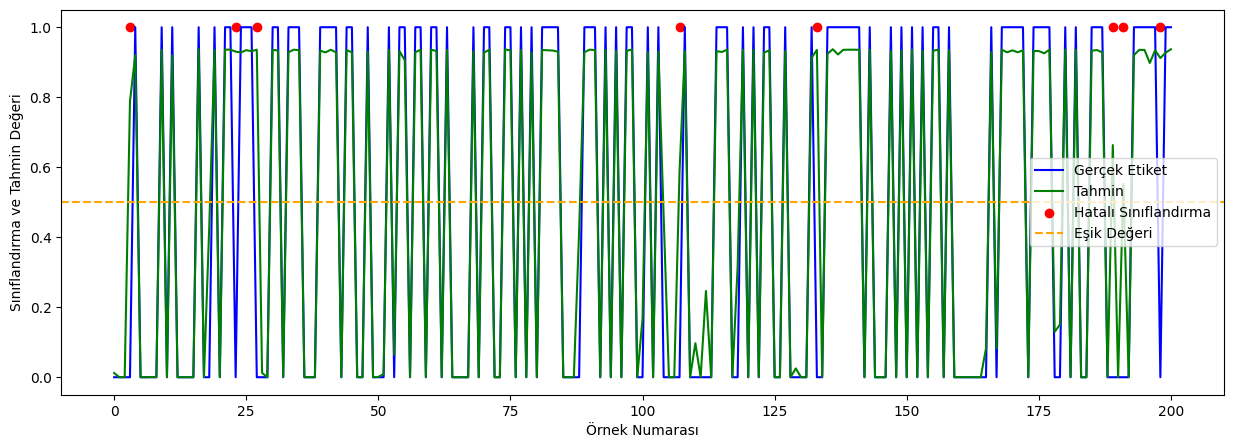

In [57]:
import matplotlib.pyplot as plt

# Tahminleri alın
predictions = model.predict(X_test)

# Eşik değeri belirleyin
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Hatalı sınıflandırılan örnekleri bulun
incorrect_predictions = np.where(binary_predictions != y_test)[0]

# Grafik üzerinde hatalı sınıflandırılan örnekleri gösterin
plt.figure(figsize=(15, 5))
plt.plot(y_test.flatten(), label='Gerçek Etiket', color='blue')
plt.plot(predictions.flatten(), label='Tahmin', color='green')
plt.scatter(incorrect_predictions, binary_predictions[incorrect_predictions], color='red', label='Hatalı Sınıflandırma')
plt.axhline(y=threshold, color='orange', linestyle='--', label='Eşik Değeri')
plt.xlabel('Örnek Numarası')
plt.ylabel('Sınıflandırma ve Tahmin Değeri')
plt.legend()
plt.show()
